In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# columns='时间，经度，纬度，直接辐照，总辐照，风速，空气透明度，空气密度'
columns='Time,longitude,latitude,directRadiation,scatterdRadiation,windSpeed,airTransparency,airDensity'
columns=list(columns.split(','))
columns

['Time',
 'longitude',
 'latitude',
 'directRadiation',
 'scatterdRadiation',
 'windSpeed',
 'airTransparency',
 'airDensity']

In [3]:
test_data = pd.read_csv('test-dataset/forecas.csv',names=columns)

In [4]:
test_data.head()

,Time,longitude,latitude,directRadiation,scatterdRadiation,windSpeed,airTransparency,airDensity
0,2018-11-22 21:30:00,85.3321,45.89681,0.0,0.0,NaN,NaN,NaN
1,2018-11-26 11:00:00,85.3321,45.89681,7.6,0.0,4.06,20.25,1.2856
2,2018-11-22 22:00:00,85.3321,45.89681,0.0,0.0,2.29,219.36,1.2237
3,2018-11-26 10:30:00,85.3321,45.89681,0.0,0.0,NaN,NaN,NaN
4,2018-11-24 10:00:00,85.3321,45.89681,0.0,0.0,1.91,54.08,1.2273


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 8 columns):
Time                 865 non-null object
longitude            865 non-null float64
latitude             865 non-null float64
directRadiation      673 non-null float64
scatterdRadiation    673 non-null float64
windSpeed            361 non-null float64
airTransparency      361 non-null float64
airDensity           361 non-null float64
dtypes: float64(7), object(1)
memory usage: 54.1+ KB


In [14]:
test_data['month'] = pd.to_datetime(test_data.Time).dt.month
test_data['day'] = pd.to_datetime(test_data.Time).dt.day
test_data['hour'] = pd.to_datetime(test_data.Time).dt.hour
test_data['min'] = pd.to_datetime(test_data.Time).dt.minute
test_data=test_data.sort_values(by='Time')

In [27]:
test_data[test_data['hour']==0][test_data['min']==0].index.tolist()[0]

C:\Users\endon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


143

C:\Users\endon\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


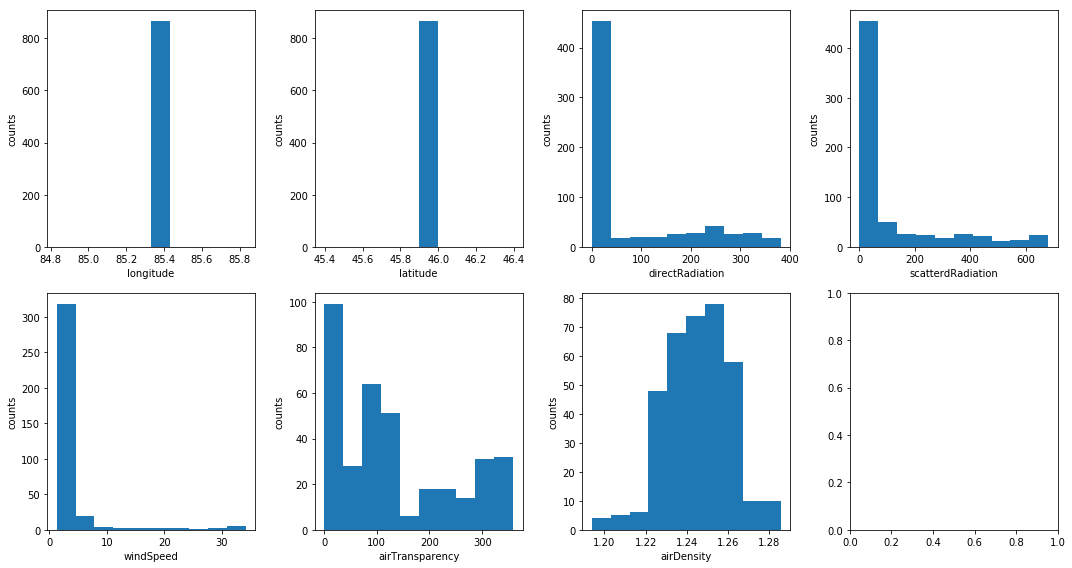

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(15,8),tight_layout=True)
for ax,col in zip(axes.ravel(),test_data.columns[1:]):
    ax.hist(test_data[col].dropna())
    ax.set_ylabel('counts')
    ax.set_xlabel(col)

In [7]:
test_data=test_data.drop(axis=1,columns=['longitude','latitude'])

In [8]:
test_data.columns

Index(['Time', 'directRadiation', 'scatterdRadiation', 'windSpeed',
       'airTransparency', 'airDensity'],
      dtype='object')

In [9]:
test_data['Time']=pd.to_datetime(test_data['Time'])
test_data=test_data.sort_values(by='Time')

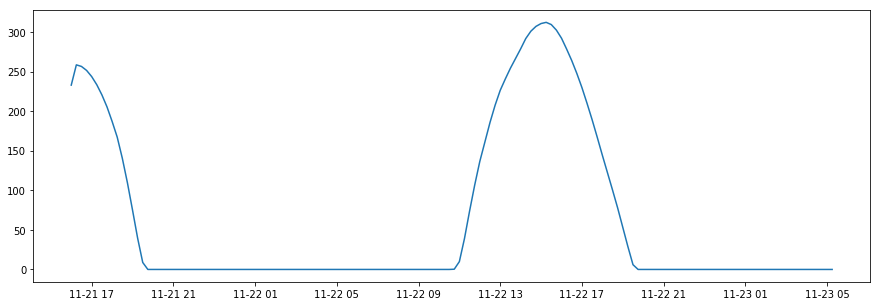

In [16]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(test_data['Time'])[:150].values,test_data['directRadiation'][:150].values)
plt.show()

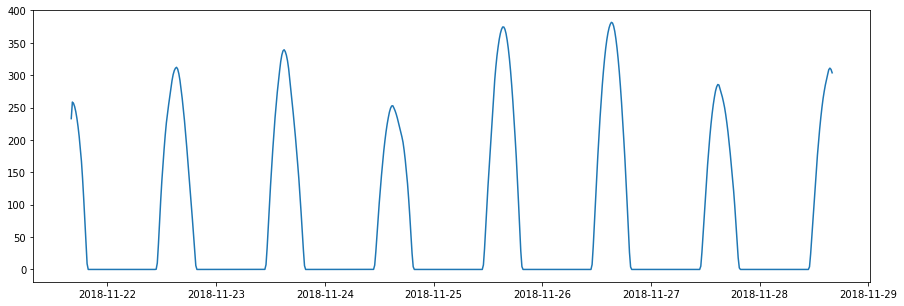

In [14]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(test_data['Time']),test_data['directRadiation'].values)
plt.show()